In [1]:
using Plots, DelimitedFiles
using Revise
using MDToolbox
#ENV["DYLD_LIBRARY_PATH"] = "/usr/local/lib"; #display width for MDToolbox

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for PlotThemes [ccf2f8ad-2431-5c83-bf29-c5338b663b6a]
│   exception = Required dependency Requires [ae029012-a4dd-5104-9daa-d747884805df] failed to load from a cache file.
└ @ Base loading.jl:1042
┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1278
┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/BqeJF/src/Revise.jl:1328
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1278


In [2]:
asd = readasd("data/myosin/8769.asd");

In [22]:
afms = []
for i = 1591:1605
    push!(afms, asd.frames[i].data[:, :])
end

┌ Info: Saved animation to 
│   fn = /Users/yasu/gdrive/MDToolbox.jl/notebook/afm_myosin01.gif
└ @ Plots /Users/yasu/.julia/packages/Plots/shY1Z/src/animation.jl:104


Plots.AnimatedGif("/Users/yasu/gdrive/MDToolbox.jl/notebook/afm_myosin01.gif")
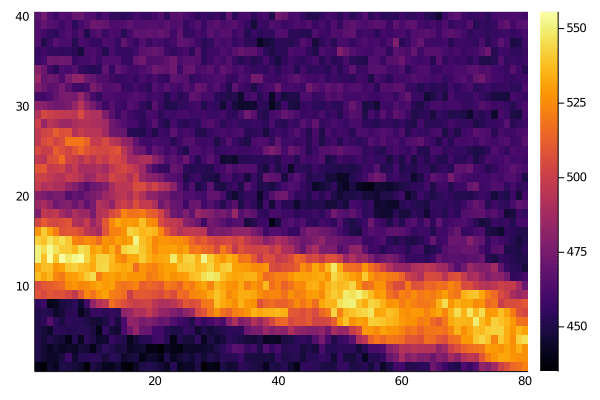

In [23]:
anim = @animate for i = 1:length(afms)
    heatmap(afms[i])
end
gif(anim, "afm_myosin01.gif", fps=3)

┌ Info: Saved animation to 
│   fn = /Users/yasu/gdrive/MDToolbox.jl/notebook/afm_myosin01_2.gif
└ @ Plots /Users/yasu/.julia/packages/Plots/shY1Z/src/animation.jl:104


Plots.AnimatedGif("/Users/yasu/gdrive/MDToolbox.jl/notebook/afm_myosin01_2.gif")
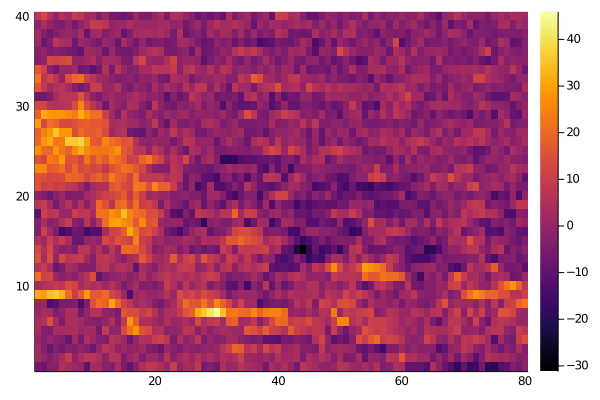

In [24]:
using Statistics

afms_average = similar(afms[1])
afms_average .= 0.0
for iframe = 1:length(afms)
    afms_average .+= (afms[iframe] .- median(afms[iframe]))
end
afms_average .= afms_average ./ length(afms)

afms_nobg = []
for iframe = 1:length(afms)
    push!(afms_nobg, (afms[iframe] .- median(afms[iframe])) .- afms_average)
end

anim = @animate for i = 1:length(afms_nobg)
    heatmap(afms_nobg[i])
end
gif(anim, "afm_myosin01_2.gif", fps=3)

In [25]:
models = readpdb("data/myosin/myosin-V_orginal.pdb")
decenter!(models)

qs = readdlm("data/quaternion/QUATERNION_LIST_576_Orient")

params = [AfmizeConfig(10.0 * (pi / 180),
    r, 
    MDToolbox.Point2D(-750, -375), 
    MDToolbox.Point2D(750, 375), 
    #MDToolbox.Point2D(-750, -300), 
    #MDToolbox.Point2D(750, 300), 
    MDToolbox.Point2D(18.75, 18.75), 
    MDToolbox.defaultParameters())
    for r in [20.0, 30.0, 40.0, 50.0]];

In [26]:
#afm_test = MDToolbox.afmize(MDToolbox.rotate(models[1, :], qs[200, :]), params[1])
#heatmap(afm_test)

In [27]:
r = getposterior_parallel(models, afms_nobg, qs, params)

iq = 175
iq = 59
iq = 406
iq = 349
iq = 291
iq = 233
iq = 117
iq = 463
iq = 520
iq = 1
iq = 60
iq = 350
iq = 176
iq = 292
iq = 521
iq = 234
iq = 2
iq = 118
iq = 407
iq = 464
iq = 61
iq = 351
iq = 177
iq = 293
iq = 522
iq = 235
iq = 3
iq = 119
iq = 408
iq = 465
iq = 62
iq = 352
iq = 178
iq = 294
iq = 523
iq = 236
iq = 4
iq = 120
iq = 409
iq = 63
iq = 466
iq = 353
iq = 179
iq = 295
iq = 524
iq = 237
iq = 5
iq = 410
iq = 64
iq = 121
iq = 354
iq = 180
iq = 467
iq = 296
iq = 525
iq = 238
iq = 411
iq = 65
iq = 6
iq = 122
iq = 355
iq = 181
iq = 297
iq = 468
iq = 526
iq = 412
iq = 66
iq = 239
iq = 7
iq = 356
iq = 123
iq = 182
iq = 298
iq = 67
iq = 527
iq = 413
iq = 240
iq = 469
iq = 357
iq = 8
iq = 183
iq = 124
iq = 299
iq = 68
iq = 414
iq = 528
iq = 241
iq = 358
iq = 470
iq = 184
iq = 9
iq = 125
iq = 69
iq = 300
iq = 415
iq = 529
iq = 359
iq = 242
iq = 185
iq = 471
iq = 10
iq = 126
iq = 70
iq = 301
iq = 416
iq = 530
iq = 360
iq = 186
iq = 243
iq = 472
iq = 11
iq = 71
iq = 127
iq = 417
iq = 30

(all = Any[[-6737.021983155906 -6640.748611223549 … -6695.751478475826 -6719.8271939936485]

[-6732.510190669935 -6630.775362058279 … -6677.059299477006 -6710.899934062557]

[-6724.644584828301 -6626.38262717118 … -6669.2686582783335 -6700.472453885833]

[-6716.0754790445535 -6622.89000397401 … -6663.69680519742 -6690.979907867673], [-6699.477433622548 -6602.144623285432 … -6612.660459034505 -6622.182481352213]

[-6688.687456163276 -6589.011026634963 … -6583.005421407797 -6590.274887336428]

[-6679.064126465456 -6574.234709804776 … -6571.276345236532 -6555.042344887442]

[-6671.844368937108 -6561.19984669854 … -6558.712510794975 -6535.777165573315], [-6914.677733812863 -6827.561769415063 … -6816.684962454043 -6844.864146780199]

[-6907.734890791348 -6816.666610371453 … -6785.693524788425 -6825.274352527038]

[-6902.760543778155 -6810.061149977962 … -6773.637325544178 -6804.271843203871]

[-6896.8418728770075 -6807.0871706512 … -6761.302049878575 -6789.940978224108], [-6841.275221643581

In [31]:
function translateafm2(afm, (dx, dy))
    afm_translated = zeros(eltype(afm), size(afm))
    (ny, nx) = size(afm)
    for i in maximum([1, 1-dx]):minimum([nx, nx-dx])
        for j in maximum([1, 1-dy]):minimum([ny, ny-dy])
            afm_translated[j+dy, i+dx] = afm[j, i]
        end
    end
    afm_translated
end

translateafm2 (generic function with 1 method)

In [32]:
afm_compute = []
for iframe = 1:length(afms)
    @show iframe
    id = argmax(r.all[iframe])
    
    #iq = argmax(r.q[iframe])
    iq = id[2]
    q = qs[iq:iq, :]

    #iparam = argmax(r.param[iframe])
    iparam = id[3]
    param = params[iparam]

    model = MDToolbox.rotate(models[1, :], q)
    a = MDToolbox.afmize(model, param)
    a = translateafm2(a, r.dxdy[iframe])
    push!(afm_compute, a)
end

iframe = 1
iframe = 2
iframe = 3
iframe = 4
iframe = 5
iframe = 6
iframe = 7
iframe = 8
iframe = 9
iframe = 10
iframe = 11
iframe = 12
iframe = 13
iframe = 14
iframe = 15


┌ Info: Saved animation to 
│   fn = /Users/yasu/gdrive/MDToolbox.jl/notebook/afm_myosin02_2.gif
└ @ Plots /Users/yasu/.julia/packages/Plots/shY1Z/src/animation.jl:104


Plots.AnimatedGif("/Users/yasu/gdrive/MDToolbox.jl/notebook/afm_myosin02_2.gif")
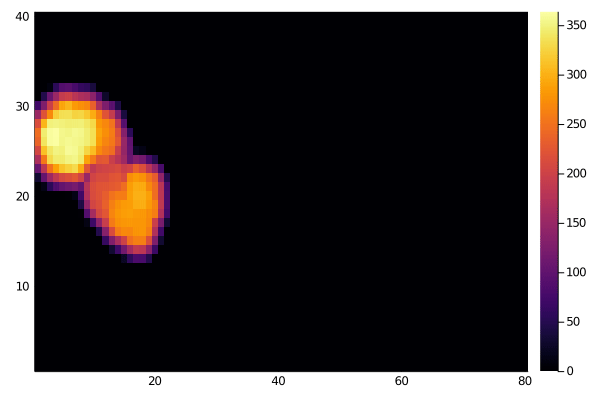

In [33]:
anim = @animate for i = 1:length(afm_compute)
    heatmap(afm_compute[i])
end
gif(anim, "afm_myosin02_2.gif", fps=3)

In [55]:
p = []
for iframe = 1:length(afms)
    push!(p, argmax(r.param[iframe]))
end

pp = []
for i = 1:length([20.0, 30.0, 40.0, 50.0])
    push!(pp, sum(p .== i))
end

In [56]:
pp

4-element Array{Any,1}:
  1
 10
  2
  2

In [63]:
bar([20.0, 30.0, 40.0, 50.0], pp, xlabel="Probe radius [Angstrom]", ylabel="Frequency", lagend=false)
savefig("bar.png")